<a href="https://colab.research.google.com/github/harshitam22/TwitterSentimentAnalysi/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [ ]:
#Twitter API Credentials
consumerKey = 'XWqbYcAioN9622YTSHGgODe0X'
consumerSecret = '8FDyi2cdMNbGDfvOXeCZKy5iw7CcZ2KnbHHXduonpwGDsgtfPd'
accessToken = '1565925882291621888-TvlGhC7yLu1siKu02RMmYhMVMU8vF6'
accessTokenSecret = 'obCyAaINCtdUPGVxAkel8vv75IECKs04kA2SzgiEFNC13'

In [ ]:
#create  the authentication object
authenticate = tweepy.OAuthHandler(consumerKey , consumerSecret )

#set the access token 
authenticate.set_access_token(accessToken , accessTokenSecret)

#Creating api object
api = tweepy.API(authenticate , wait_on_rate_limit = True)

In [ ]:
while True:
  keyword = input("Enter the keyword or hashtag to search:")
  noOfTweet = int(input("How many tweets do you want to search:"))

  if keyword == "":
    print("Invalid keyword")
    continue

  tweets = tweepy.Cursor(api.search , q=keyword).items(noOfTweet)
  tweet_list = []

  for tweet in tweets:
    tweet_list.append(tweet.text)
  break  

Invalid keyword


In [ ]:
tweet_list

['RT @PEPalerts: Indian actress Tunisha Sharma dies by suicide; police arrests her co-star, ex-boyfriend Sheezan Khan\nhttps://t.co/aRLUSuiifx',
 'Shivin Narang remembers his co-star Tunisha Sharma on her birthday, shares a reel filled with their sweet memories.… https://t.co/xNVjlnXs2X',
 'Indian actress Tunisha Sharma dies by suicide; police arrests her co-star, ex-boyfriend Sheezan Khan\nhttps://t.co/aRLUSuiifx',
 "Court visuals: Sheezan Khan's hearing regarding Tunisha Sharma's demise is on\n\n#TunishaSharmaDeath #sheezankhan… https://t.co/yg9FDHHvf3",
 'RT @vinod_bansal: ये बजरंग दल के चीते हैं जो अपने दम पर जीते हैं..\nहिंदू बेटियों के सम्मान में, बजरंग दल मैदान में..\nhttps://t.co/zRrbfQjdcg',
 "#BreakingNews \nAvneet Kaur to replace Tunisha Sharma in Ali Baba: Dastaan-E-Kabul - Here's what we know -… https://t.co/0WPAuVDGG8",
 'Fakta Baru! Sehari Sebelum Kematian Tunisha Sharma Sempat Minta Uang &amp; Diduga Dieksploitasi sang Ibu\n#tunishasharma… https://t.co/iexbM7DS2k',
 'क्

In [ ]:
#Cleaning
tweet_list = pd.DataFrame(tweet_list)

#removing duplicate tweets
tweet_list.drop_duplicates(inplace = True)

tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]

#Removing RT, Punctuation , emoticons etc
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
emoj = lambda x : re.sub(emoji_pattern , ""  , x)
remove_rt = lambda x: re.sub('RT @\w+: ' , " ", x)
rt = lambda x: re.sub("(@[A-Za-z0–9_]+)|(^[0-9A-Za-z \t])|(\w+:\/\/\S+)" , " " , x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt).map(emoj)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)  

,0,text
0,RT @PEPalerts: Indian actress Tunisha Sharma d...,indian actress tunisha sharma dies by suicide...
1,Shivin Narang remembers his co-star Tunisha Sh...,hivin narang remembers his co-star tunisha sh...
2,Indian actress Tunisha Sharma dies by suicide;...,ndian actress tunisha sharma dies by suicide;...
3,Court visuals: Sheezan Khan's hearing regardin...,ourt visuals: sheezan khan's hearing regardin...
4,RT @vinod_bansal: ये बजरंग दल के चीते हैं जो अ...,ये बजरंग दल के चीते हैं जो अपने दम पर जीते है...
5,#BreakingNews \nAvneet Kaur to replace Tunisha...,#breakingnews \navneet kaur to replace tunisha...
6,Fakta Baru! Sehari Sebelum Kematian Tunisha Sh...,akta baru! sehari sebelum kematian tunisha sh...
7,"क्या वाकई में प्रेग्नेंट हैं कैटरीना कैफ, इस फ...","क्या वाकई में प्रेग्नेंट हैं कैटरीना कैफ, इस फ..."
8,Tunisha Sharma Case: आरोपी Sheezan की जमानत या...,unisha sharma case: आरोपी sheezan की जमानत या...
9,"तुनिषा शर्मा के पास नहीं होते थे पैसे, फ्रेंड ...","तुनिषा शर्मा के पास नहीं होते थे पैसे, फ्रेंड ..."


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'    

tw_list['polarity'] = tw_list['text'].apply(getPolarity)
tw_list['subjectivity'] = tw_list['text'].apply(getSubjectivity)
tw_list['sentiment'] = tw_list['polarity'].apply(getSentiment)

tw_list

,0,text,polarity,subjectivity,sentiment
0,RT @PEPalerts: Indian actress Tunisha Sharma d...,indian actress tunisha sharma dies by suicide...,0.000,0.000,Neutral
1,Shivin Narang remembers his co-star Tunisha Sh...,hivin narang remembers his co-star tunisha sh...,0.375,0.775,Positive
2,Indian actress Tunisha Sharma dies by suicide;...,ndian actress tunisha sharma dies by suicide;...,0.000,0.000,Neutral
3,Court visuals: Sheezan Khan's hearing regardin...,ourt visuals: sheezan khan's hearing regardin...,0.000,0.000,Neutral
4,RT @vinod_bansal: ये बजरंग दल के चीते हैं जो अ...,ये बजरंग दल के चीते हैं जो अपने दम पर जीते है...,0.000,0.000,Neutral
5,#BreakingNews \nAvneet Kaur to replace Tunisha...,#breakingnews \navneet kaur to replace tunisha...,0.000,0.000,Neutral
6,Fakta Baru! Sehari Sebelum Kematian Tunisha Sh...,akta baru! sehari sebelum kematian tunisha sh...,0.000,0.000,Neutral
7,"क्या वाकई में प्रेग्नेंट हैं कैटरीना कैफ, इस फ...","क्या वाकई में प्रेग्नेंट हैं कैटरीना कैफ, इस फ...",0.000,0.000,Neutral
8,Tunisha Sharma Case: आरोपी Sheezan की जमानत या...,unisha sharma case: आरोपी sheezan की जमानत या...,0.000,0.000,Neutral
9,"तुनिषा शर्मा के पास नहीं होते थे पैसे, फ्रेंड ...","तुनिषा शर्मा के पास नहीं होते थे पैसे, फ्रेंड ...",0.000,0.000,Neutral


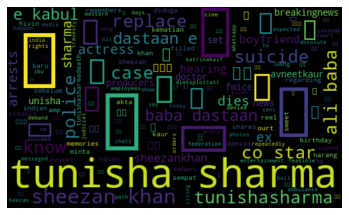

In [ ]:
#creating a word cloud
allWords = ' '.join([twts for twts in tw_list['text']])
wordCloud = WordCloud(width = 500 , height = 300 , random_state=21 , max_font_size=119).generate(allWords)

plt.imshow(wordCloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
Neutral,17,89.47
Positive,2,10.53


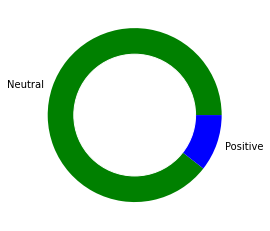

In [ ]:
# create data for Pie Chart
piechart = count_values_in_column(tw_list,"sentiment")
names= piechart.index
size=piechart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()